# Linkit Grundlagenschulung (1. Teil)


## 1. Business & Data Understanding

An established food retailer has introduced a self-scanning system that allows customers to scan their items using a handheld mobile scanner while shopping. This type of payment leaves retailers open to the risk that a certain number of customers will take advantage of this freedom to commit fraud by not scanning all of the items in their cart.

To minimize losses, the food retailer hopes to identify cases of fraud using targeted follow-up checks. The challenge here is to keep the number of checks as low as possible to avoid unnecessary added expense as well as to avoid putting off innocent customers due to false accusations. The objective is to create a model to classify the scans as fraudulent or non-fraudulent. The classification does not take into account whether the fraud was committed intentionally or inadvertently.

<br>

**Überlegen ob wir das drin lassen:**

In addition to this general task, the retailer has defined his own domain specific costs outcomes for each possible prediction. This needs to be considered when evaluation possible prediction models.

- True Positive Cost: 5€
- False Positive Cost: -25 €
- True Negative Cost: 0€
- False Negative Cost: -5€

Thus, the retailer receives a profit of € 5 for every correctly identified fraud attempt (TP). However, for every fraud case that goes unexposed he loses € 5 (FN). A costumer falsely accused of fraud (FP), might not return to this store, which is denoted by a € 25 loss for the retailer. An honest customer identified (TN) correctly means neither profit nor loss for the retailer.

- **Trust Level** ~ A customers trust level rated between 1-6
- **Total scaned Item in sec** ~ total time in seconds between first and last product scanned
- **Grand total** ~ Total of products scanned
- **Line items voids** ~ Nr. of voided scanes
- **Scans without registration** ~ Attempts to scan something without actually scanning something
- **Quantity Modification** ~ Number of modified quantities
- **Scanned lined items per seconds** ~ Average number of scanned products
- **Value per second** ~ Average total value per second
- **Line items void per seconds** ~ Avg nr of item voids per total nr of all scanned and not canceled product
- **Customer Sex** ~ Information about the sex of the customer
- **Store Location** ~ Location of the Store
- **Payment Type** ~ Information on the type of payment (credit card, debit card, ...) used for  the transaction
- **Fraud** ~ Fraudulent (1) or not fraudulent (0)

## 2. How do we get a quick overview over the data set?



In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

After successfull data import its essential to have a look at the data to check whether the import was successfull and to get an overall impression on data types, number of Null-counts etc.

Pandas provides several methods to do so, lets have a look at it

In [3]:
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,2020/11/06 19:43:53,male,Frankfurt,Mastercard
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,2020/10/04 18:22:17,NaN,Karlsruhe,Mastercard
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,2020/10/23 19:08:53,NaN,Stuttgart,BB Bank Karlsruhe
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,2020/12/07 21:00:09,male,München,Sparkasse Munchen
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,2020/12/20 21:32:22,male,München,Sparkasse Karlsruhe


In [4]:
data.tail()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0,2020/06/26 14:17:29,female,Stuttgart,Visa
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1,2020/09/11 11:51:09,female,Stuttgart,Volksbank Frankfurt
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0,2020/08/28 16:50:42,male,Stuttgart,BB Bank Karlsruhe
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0,2020/10/31 19:29:27,female,München,Apple Pay
1878,4,1140,38.03,2,2,3,0.016667,0.033360,0.105263,0,2020/04/25 11:44:06,male,München,Sparkasse Stuttgart


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
 10  checkoutTime               1879 non-null   object 
 11  customer_sex               1683 non-null   object 
 12  storeLocation              1879 non-null   object 
 13  paymentType                1879 non-null   objec

In [6]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


After gaining a first impression with the methods explained before, it might be crucial to look at some rows or columns in more detail. Moreover, these methods that will be explained here are helpul to select data by position or index and thus allows intuitive getting and setting of subsets.

Data can be selected as follows:

(1) by one or several column names,

(2) using a conditional selection of column values,

(3) by index position.



In [7]:
# selection by column
data['trustLevel']

0       5
1       3
2       3
3       6
4       5
       ..
1874    1
1875    1
1876    4
1877    2
1878    4
Name: trustLevel, Length: 1879, dtype: int64

In [8]:
# selection of several columns
data[['scannedLineItemsPerSecond', 'valuePerSecond']]

,scannedLineItemsPerSecond,valuePerSecond
0,0.027514,0.051898
1,0.129630,0.253333
2,0.008575,0.041003
3,0.016192,0.051541
4,0.062791,0.189605
...,...,...
1874,0.071651,0.236854
1875,0.065491,0.105516
1876,0.094937,0.132373
1877,0.035036,0.091504


In [9]:
# conditional selection
data[data['fraud']==1]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1,2020/08/03 11:06:39,female,München,Sparkasse Karlsruhe
37,2,1397,62.59,7,9,4,0.017895,0.044803,0.280000,1,2020/06/08 10:02:04,female,Frankfurt,Google Pay
53,1,1385,34.68,5,8,4,0.019495,0.025040,0.185185,1,2020/10/20 12:36:47,male,Stuttgart,Volksbank Frankfurt
91,1,996,71.94,7,0,1,0.027108,0.072229,0.259259,1,2020/12/27 13:54:52,female,Frankfurt,Mastercard
97,2,1305,87.65,7,8,4,0.021456,0.067165,0.250000,1,2020/09/12 11:52:10,female,München,Apple Pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2,1689,13.70,8,1,1,0.017762,0.008111,0.266667,1,2020/12/08 13:33:21,male,Frankfurt,Sparkasse Stuttgart
1838,1,1465,58.95,10,0,2,0.017065,0.040239,0.400000,1,2020/11/11 13:02:15,male,Stuttgart,Volksbank Stuttgart
1852,1,801,73.63,6,1,4,0.034956,0.091923,0.214286,1,2020/07/06 10:34:32,female,Karlsruhe,Google Pay
1857,1,1400,59.43,3,6,2,0.016429,0.042450,0.130435,1,2020/08/19 11:24:23,male,Karlsruhe,Sparkasse Frankfurt


In [10]:
# another way to perform conditional selection / access by label
data.loc[(data['trustLevel']=='high risk')]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType


In [11]:
# conditional selection of one column
data.loc[(data['trustLevel']=='high risk'), ['scansWithoutRegistration']]

,scansWithoutRegistration


In [12]:
#selection by position
#data.iloc[3]
data.iloc[5:10]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1,2020/08/03 11:06:39,female,München,Sparkasse Karlsruhe
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0,2020/01/18 07:42:24,female,München,Sparkasse Frankfurt
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0,2020/12/12 21:13:06,female,Stuttgart,Visa
8,6,962,65.44,7,0,2,0.028067,0.068025,0.259259,0,2020/02/04 08:25:48,male,Karlsruhe,Apple Pay
9,2,725,41.08,10,2,4,0.037241,0.056662,0.370370,0,2020/02/07 08:31:31,female,Karlsruhe,Sparkasse Frankfurt


In [13]:
# get Index:
list(data[data['storeLocation']=='München'].index.values) 

[3,
 4,
 5,
 6,
 14,
 15,
 17,
 22,
 25,
 27,
 31,
 33,
 43,
 44,
 45,
 51,
 52,
 60,
 62,
 69,
 71,
 72,
 76,
 80,
 92,
 94,
 95,
 97,
 99,
 111,
 113,
 116,
 120,
 121,
 129,
 136,
 143,
 144,
 147,
 150,
 157,
 164,
 166,
 168,
 170,
 173,
 175,
 177,
 183,
 184,
 189,
 199,
 202,
 211,
 212,
 213,
 217,
 219,
 224,
 225,
 229,
 230,
 234,
 238,
 239,
 243,
 249,
 252,
 253,
 259,
 261,
 266,
 281,
 291,
 293,
 298,
 299,
 302,
 307,
 314,
 318,
 319,
 322,
 327,
 329,
 336,
 337,
 338,
 341,
 342,
 343,
 348,
 351,
 359,
 360,
 363,
 368,
 370,
 371,
 373,
 375,
 377,
 384,
 386,
 388,
 398,
 400,
 402,
 409,
 413,
 414,
 418,
 421,
 422,
 426,
 430,
 431,
 438,
 439,
 444,
 447,
 448,
 451,
 453,
 458,
 459,
 460,
 461,
 463,
 466,
 474,
 486,
 487,
 488,
 493,
 499,
 500,
 503,
 505,
 512,
 513,
 516,
 519,
 524,
 528,
 536,
 543,
 548,
 553,
 556,
 557,
 562,
 565,
 569,
 575,
 582,
 583,
 584,
 587,
 588,
 590,
 596,
 604,
 605,
 610,
 615,
 619,
 621,
 624,
 628,
 635,
 641,
 

Often it is usefull to create a copy of the dataframe. This can be done by either create a deep copy which creates a new object with a copy of an objects inidces and data (deep=True). All modifications to the copied dataframe will not be reflected in the origional dataframe. Another possibility is to create a shallow copy (deep=False) with references to the origional datas inidces and data, so that any changes to the origional dataframe will be reflected in the copy as well. The pandas function .copy() creates a deep copy by default.  

In [14]:
# create a copy of the dataframe
data_new = data.copy()

In [15]:
# moreover sometimes it might be good to delete a column, e.g. when their information is not usefull for your task
data_new = data_new.drop(columns='customer_sex')

In [16]:
data_new.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,storeLocation,paymentType
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,2020/11/06 19:43:53,Frankfurt,Mastercard
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,2020/10/04 18:22:17,Karlsruhe,Mastercard
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,2020/10/23 19:08:53,Stuttgart,BB Bank Karlsruhe
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,2020/12/07 21:00:09,München,Sparkasse Munchen
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,2020/12/20 21:32:22,München,Sparkasse Karlsruhe


### Now you: Data Overview

Perform the following selections:
1.    Return all purchases where the number of scans without registration is higher than 5. 
2.    How many purchases with a trust level below 2 are done in Munich?
3.    What is the maximum scanned line items per second of those purchases that include more than three scans without registration?
4.    Return the index of the purchases where the grandTotal is higher than 60 and the trust level below 3

Solution

In [20]:
# 1)
data.loc[(data['scansWithoutRegistration'] > 5) | (data['scansWithoutRegistration'] > 5)]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,2020/10/23 19:08:53,NaN,Stuttgart,BB Bank Karlsruhe
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,2020/12/20 21:32:22,male,München,Sparkasse Karlsruhe
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0,2020/01/18 07:42:24,female,München,Sparkasse Frankfurt
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0,2020/12/12 21:13:06,female,Stuttgart,Visa
12,4,1736,5.46,4,10,4,0.005760,0.003145,0.400000,0,2020/06/26 14:16:01,female,Karlsruhe,BB Bank Karlsruhe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,4,212,88.01,3,6,5,0.014151,0.415142,1.000000,0,2020/09/08 17:18:57,male,Karlsruhe,Volksbank Stuttgart
1869,4,452,44.59,7,9,3,0.050885,0.098650,0.304348,0,2020/08/18 16:27:35,female,Frankfurt,Sparkasse Stuttgart
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0,2020/06/26 14:17:29,female,Stuttgart,Visa
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0,2020/08/28 16:50:42,male,Stuttgart,BB Bank Karlsruhe


In [31]:
# 2)
data.loc[(data['trustLevel']<2) & (data['storeLocation'] == 'München')].count()

trustLevel                   84
totalScanTimeInSeconds       84
grandTotal                   84
lineItemVoids                84
scansWithoutRegistration     84
quantityModifications        84
scannedLineItemsPerSecond    84
valuePerSecond               84
lineItemVoidsPerPosition     84
fraud                        84
checkoutTime                 84
customer_sex                 77
storeLocation                84
paymentType                  84
dtype: int64

In [32]:
# 3)
data['scannedLineItemsPerSecond'].loc[data['scansWithoutRegistration']> 3].max()

4.83333333333333

In [33]:
# 4)
data2 = data.loc[(data['grandTotal'] > 60.0 ) & (data['trustLevel']<3)]
list(data2.index.values)

[24,
 37,
 41,
 44,
 52,
 56,
 61,
 91,
 97,
 112,
 115,
 121,
 136,
 142,
 144,
 156,
 157,
 159,
 161,
 172,
 174,
 180,
 182,
 190,
 192,
 197,
 205,
 215,
 221,
 242,
 259,
 260,
 262,
 271,
 278,
 299,
 301,
 308,
 309,
 310,
 312,
 317,
 329,
 330,
 332,
 333,
 335,
 348,
 356,
 359,
 368,
 375,
 378,
 389,
 390,
 396,
 408,
 410,
 414,
 433,
 436,
 440,
 451,
 466,
 490,
 498,
 501,
 521,
 524,
 530,
 537,
 542,
 548,
 550,
 557,
 558,
 578,
 585,
 590,
 593,
 601,
 620,
 621,
 629,
 630,
 634,
 651,
 659,
 663,
 674,
 676,
 682,
 687,
 693,
 694,
 699,
 704,
 707,
 710,
 715,
 720,
 724,
 734,
 736,
 744,
 745,
 750,
 753,
 754,
 755,
 757,
 759,
 760,
 773,
 776,
 778,
 802,
 807,
 816,
 824,
 841,
 859,
 863,
 876,
 882,
 883,
 884,
 889,
 900,
 913,
 914,
 929,
 948,
 954,
 965,
 967,
 979,
 997,
 1005,
 1009,
 1011,
 1013,
 1015,
 1017,
 1019,
 1024,
 1029,
 1036,
 1052,
 1078,
 1093,
 1099,
 1106,
 1142,
 1144,
 1147,
 1162,
 1165,
 1195,
 1198,
 1210,
 1212,
 1218,
 1228,

### Feature Generation

Sometimes our dataset inlcudes one or multiple existing information (features) that can be thoughtfully combined to a new feature providing additional information. Let's have a look if we can find something in our dataset.

In [34]:
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,checkoutTime,customer_sex,storeLocation,paymentType
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,2020/11/06 19:43:53,male,Frankfurt,Mastercard
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,2020/10/04 18:22:17,NaN,Karlsruhe,Mastercard
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,2020/10/23 19:08:53,NaN,Stuttgart,BB Bank Karlsruhe
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,2020/12/07 21:00:09,male,München,Sparkasse Munchen
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,2020/12/20 21:32:22,male,München,Sparkasse Karlsruhe


In [35]:
# example for feature generation: use scanTimeInSeconds multiplied with scannedLineItemsPerSecond to get the total number of items scanned
data['totalItems'] = (data['totalScanTimeInSeconds']*data['scannedLineItemsPerSecond'])
data['totalItems']

0       29.0
1       14.0
2       13.0
3       29.0
4       27.0
        ... 
1874    23.0
1875    26.0
1876    30.0
1877    24.0
1878    19.0
Name: totalItems, Length: 1879, dtype: float64

In [36]:
data['checkoutTime'] = data['checkoutTime'].astype(np.datetime64)
data['checkoutDate'] = data['checkoutTime'].dt.date

### Now You: Feature Generation

Calculate the following features and save them as a new column: 

1. Time features: 
    1. Checkout month
    2. Checkout year
    3. Hour of checkout
    

2. Price feature: Average Price per Item in a Transaction

**Note**: Save the value as a new column called 'meanPricePerItem'

In [37]:
# 1)
data['checkoutMonth'] = data['checkoutTime'].dt.month
data['checkoutYear'] = data['checkoutTime'].dt.year
data['checkoutDayTime'] = data['checkoutTime'].dt.hour

In [38]:
# 2)
data['meanPricePerItem'] = (data['grandTotal'] / data['totalItems'])
data['meanPricePerItem']

0       1.886207
1       1.954286
2       4.781538
3       3.183103
4       3.019630
          ...   
1874    3.305652
1875    1.611154
1876    1.394333
1877    2.611667
1878    2.001579
Name: meanPricePerItem, Length: 1879, dtype: float64

see more here: pandas doc https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## 3. Data Visualization & Insights

In order to gain insight into our data through plots, we can use several libraries.
Some of them are briefly introduced below.
The most important is the Python standard library called Matplotlib. Its a useful tool when we want to create complex plots. However, the code effort is higher than if we use e.g. the pandas plot API.
The most important plots are shown below, using both Matplotlib and the Pandas API.

### Load Packages

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Heatmap

<AxesSubplot:>

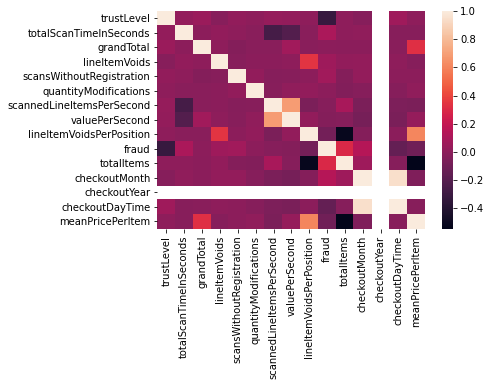

In [40]:
corMat = data.corr()
sns.heatmap(corMat, xticklabels=corMat.columns, yticklabels=corMat.columns, annot=False)

### Scatterplot

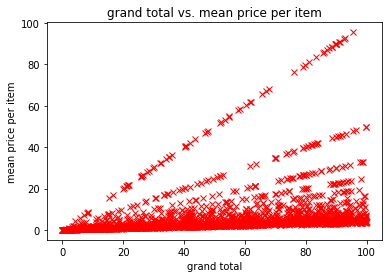

In [41]:
plt.plot( data['grandTotal'], data['meanPricePerItem'], 'x', color='red' )
plt.xlabel('grand total')
plt.ylabel('mean price per item')
plt.title('grand total vs. mean price per item')
plt.show()

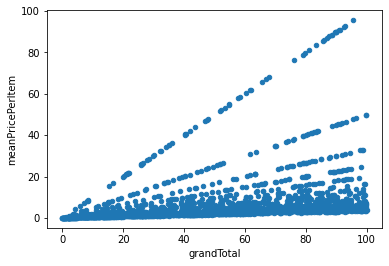

In [42]:
data.plot.scatter(x='grandTotal', y='meanPricePerItem');

### Boxplot

Text(0.5, 1.0, 'Boxplot of grandTotal')

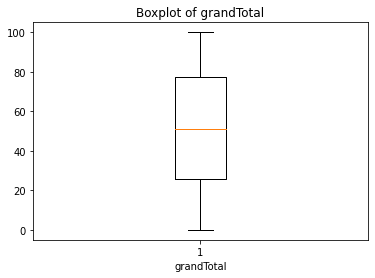

In [43]:
bxdct = plt.boxplot( data['grandTotal'])
plt.xlabel('grandTotal')
plt.title('Boxplot of grandTotal')

<AxesSubplot:>

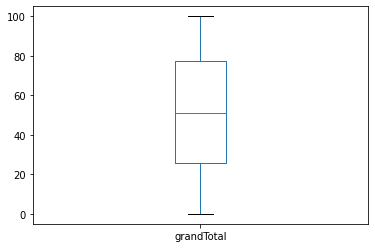

In [44]:
data['grandTotal'].plot.box()

### Histogram

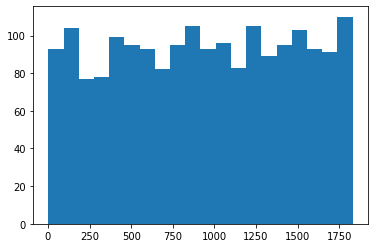

In [45]:
ax = plt.hist( data['totalScanTimeInSeconds'] , bins=20)

<AxesSubplot:>

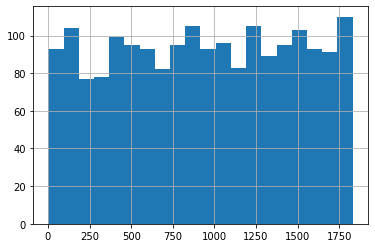

In [46]:
data['totalScanTimeInSeconds'].hist( bins=20 )

### Displot

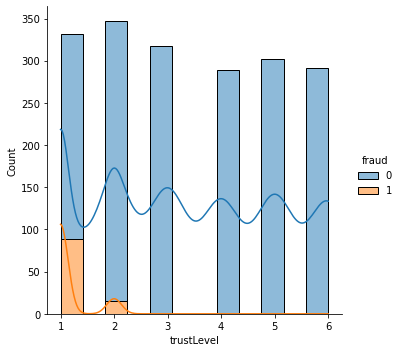

In [47]:
# Idee: Distplot für die Klassenverteilung
#sns.displot(data[data['fraud']==0]['trustLevel'], kind='hist')
#sns.displot(data[data['fraud']==1]['trustLevel'], kind='hist')
sns.displot(data=data, x="trustLevel", hue="fraud", multiple="stack", kind='hist', kde=True)


### Scatter-Matrix

In [48]:
scatterMat_df = data.sort_values(['fraud'], ascending=1)
scatterMat_features = ['valuePerSecond','meanPricePerItem','totalScanTimeInSeconds','lineItemVoidsPerPosition']

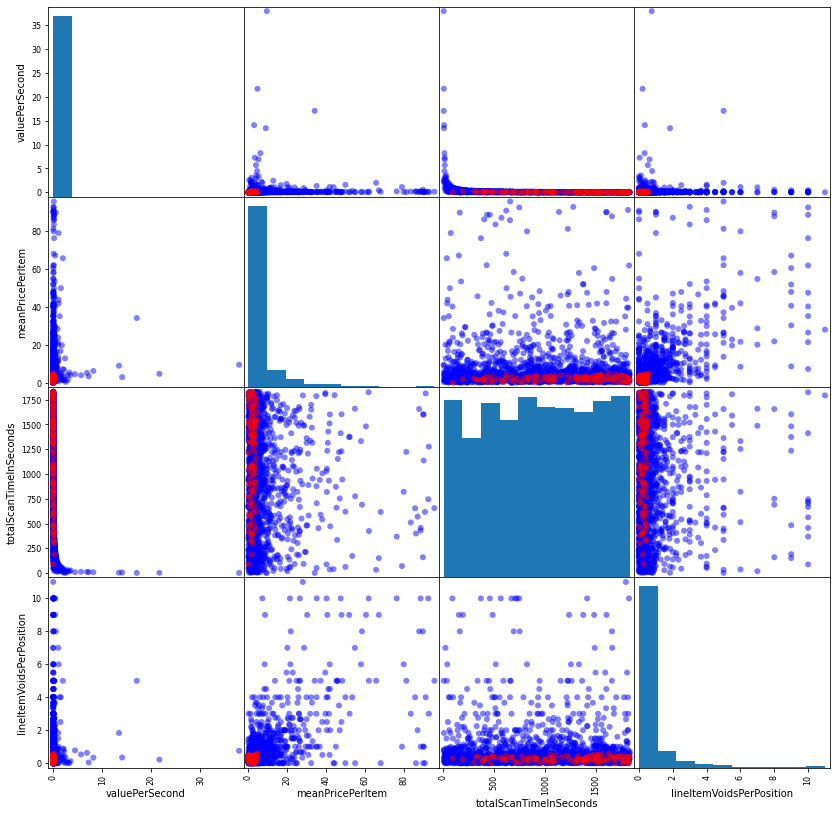

In [49]:
ax = pd.plotting.scatter_matrix(scatterMat_df[scatterMat_features], c=scatterMat_df['fraud'], figsize=[14, 14], cmap='bwr', marker='O')

### Line Graph

In [50]:
data.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'checkoutTime', 'customer_sex',
       'storeLocation', 'paymentType', 'totalItems', 'checkoutDate',
       'checkoutMonth', 'checkoutYear', 'checkoutDayTime', 'meanPricePerItem'],
      dtype='object')

In [51]:
monthlyReport = data.groupby(['checkoutMonth','checkoutYear']).sum()
monthlyReport

,,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,totalItems,checkoutDayTime,meanPricePerItem
checkoutMonth,checkoutYear,,,,,,,,,,,,,
1,2020,510,131074,7597.32,796,709,381,9.750964,41.142874,127.230139,0,2030.0,1043,1180.632179
2,2020,498,116526,6745.24,722,619,338,16.504978,79.289895,105.520131,0,2065.0,1122,1131.457482
3,2020,543,140769,7789.36,929,754,411,12.730509,53.475534,126.684345,0,2307.0,1538,1214.228247
4,2020,519,137036,7698.85,778,705,403,10.286099,32.285085,100.956837,0,2300.0,1624,978.136613
5,2020,540,161412,8116.81,721,724,376,5.617002,18.749365,127.718768,0,2130.0,1849,1265.882123
6,2020,520,156279,8198.26,916,836,410,13.208762,25.214341,120.997337,18,2573.0,2144,1174.417903
7,2020,562,160455,8340.48,966,868,455,7.878740,34.565008,123.381248,15,2571.0,2407,1135.627994
8,2020,473,133785,7685.20,777,731,333,5.215739,13.782732,104.736666,16,2462.0,2198,922.825470
9,2020,527,161654,9043.30,952,855,415,6.980520,26.102737,135.111891,17,2647.0,2835,1138.351254


<AxesSubplot:xlabel='checkoutMonth,checkoutYear'>

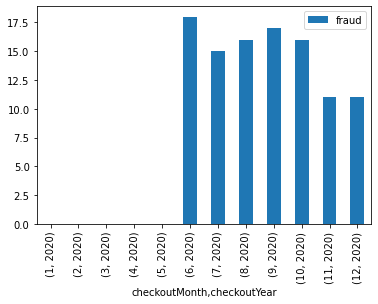

In [52]:
monthlyReport.plot(y='fraud', kind = 'bar')

### Now you: Plotting
1) The manager wants to know the monthly turnover. Create a plot that shows the monthly turnover (sum over grandTotal). Use Panda's plotting API to do this.

2) You want to prove that people make more expensive purchases during the Christmas season and therefore the turnover per transaction is higher. Create a suitable plot to test the claim.

***Hint***: You need to group the data again, using mean() instead of sum()

3) In order to prevent frauds, you want to employ additional personnel. Since this is a costly meassure, you want to limit the working time, to the hours with the highest risk of fraud. Create a plot, that shows, at what time fraudulent transactions take place most frequently.

4) Find out at which location (storeLocation) a disproportionate amount of fraud takes place.

***Hint***: To do so, you can regroup the data by the 'storeLocation' feature. By using the count()-method you will get the total number of transactions per store. The sum()-method will yield the number of fraudulent transactions.

Solution
1)

<AxesSubplot:xlabel='checkoutMonth,checkoutYear'>

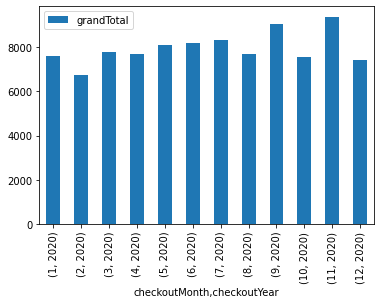

In [53]:
monthlyReport.plot(y='grandTotal', kind = 'bar')

Solution 2)

<AxesSubplot:xlabel='checkoutMonth,checkoutYear'>

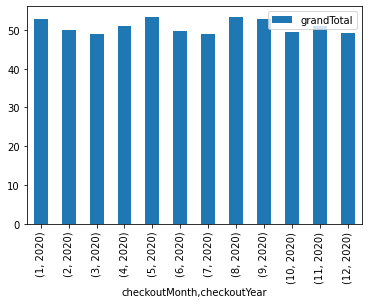

In [54]:
monthlyReport = data.groupby(['checkoutMonth','checkoutYear']).mean()
monthlyReport.plot(y='grandTotal', kind='bar')

Solution 3)

<AxesSubplot:xlabel='checkoutDayTime'>

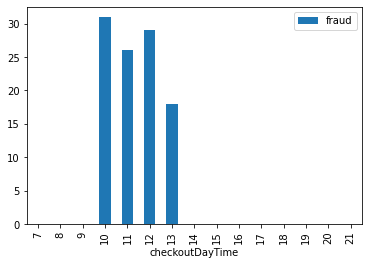

In [55]:
hourlyReport = data.groupby('checkoutDayTime').sum()
hourlyReport.plot(y='fraud', kind='bar')

In comparison to the the unfraudulent transactions

<AxesSubplot:xlabel='checkoutDayTime'>

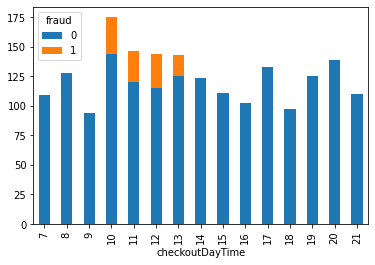

In [56]:
hourlyReport = data.groupby(['checkoutDayTime', 'fraud']).size().unstack(level=1)
hourlyReport.plot(kind='bar', stacked=True)

Solution 4)

<AxesSubplot:xlabel='storeLocation'>

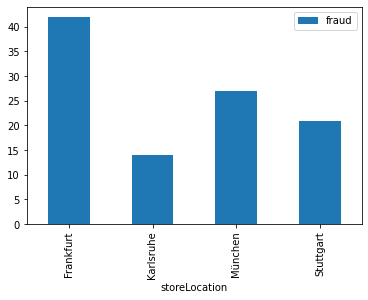

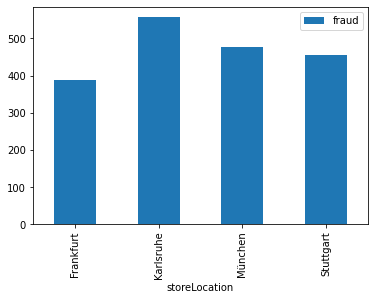

In [57]:
localReport = data.groupby('storeLocation').sum()
localTransactions = data.groupby('storeLocation').count()
localReport.plot(y=['fraud'], kind='bar')
localTransactions.plot(y=['fraud'], kind='bar')

Solution 4) Using a single plot

<AxesSubplot:xlabel='storeLocation'>

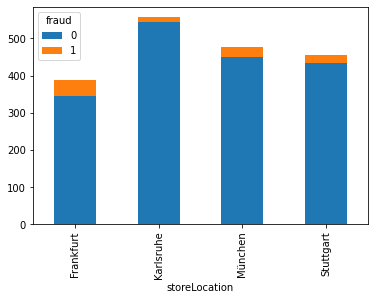

In [58]:
localReport = data.groupby(['storeLocation', 'fraud']).size().unstack(level=1)
localReport.plot(kind = 'bar', stacked=True)

## 4. Data Preprocessing & Cleaning

### Check dtypes

In [59]:
data.dtypes

trustLevel                            int64
totalScanTimeInSeconds                int64
grandTotal                          float64
lineItemVoids                         int64
scansWithoutRegistration              int64
quantityModifications                 int64
scannedLineItemsPerSecond           float64
valuePerSecond                      float64
lineItemVoidsPerPosition            float64
fraud                                 int64
checkoutTime                 datetime64[ns]
customer_sex                         object
storeLocation                        object
paymentType                          object
totalItems                          float64
checkoutDate                         object
checkoutMonth                         int64
checkoutYear                          int64
checkoutDayTime                       int64
meanPricePerItem                    float64
dtype: object

### Replace NA-Values

NA-Values can cause problems when fitting models. Therefore, we want to fill these gaps in our dataset.
There are several options to do so. For example we can either fill a gap with the next valid observation 'bfill' or with the previous valid ovservation 'ffill'

In [60]:
data['customer_sex'].isnull().values.any()

True

In [61]:
data['customer_sex'] = data['customer_sex'].fillna(method='ffill')
# data.fillna(value='divers')
# data_2.iloc[57:66][['customer_sex','fraud']]

In [62]:
# data = data.fillna(method="bfill", axis=1)

Furthermore, we could fill gaps by using the mean value of each column instead of relying on the next / previous observation

In [63]:
# data = data.fillna(data.mean())

### Standardization and Normalization

#### Normalization: Scale values between 0 and 1

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['valuePerSecondScaled']] = scaler.fit_transform(data[['valuePerSecond']])

Text(0.5, 1.0, 'Normalized')

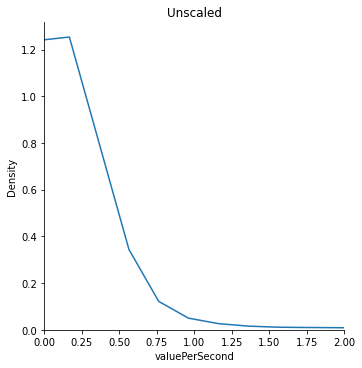

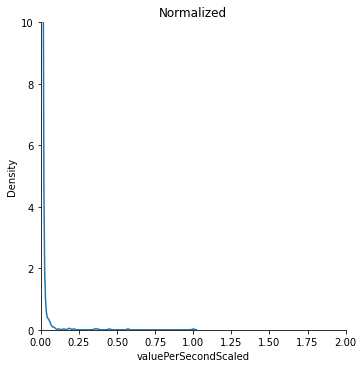

In [65]:
sns.displot(data['valuePerSecond'], kind='kde')
plt.xlim(0,2)
plt.title('Unscaled')
sns.displot(data['valuePerSecondScaled'], kind='kde')
plt.xlim(0,2)
plt.ylim(0,10)
plt.title('Normalized')

#### Standardization: Scale with mean of 0 and std of 1

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['scannedLineItemsPerSecondScaled']] = scaler.fit_transform(data[['scannedLineItemsPerSecond']])

Text(0.5, 1.0, 'Normalized')

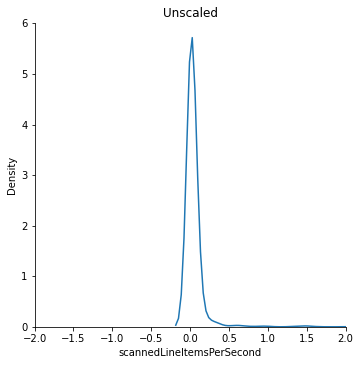

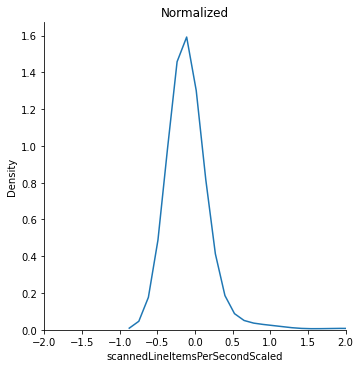

In [67]:
sns.displot(data['scannedLineItemsPerSecond'], kind='kde')
plt.xlim(-2,2)
plt.title('Unscaled')
sns.displot(data['scannedLineItemsPerSecondScaled'], kind='kde')
plt.xlim(-2,2)
plt.title('Normalized')

### Dummy Features

We often have to deal with categorial features. In order to be able to work with them, we often have to encode them correctly. There are two approaches for this task:

***One-Hot Encoding***

One-hot encoding means converting each category value into a new column and assigns a 1 or 0 (True/False) value to the column

We apply One-Hot Encoding when:
1. The categorical feature is not ordinal (e.g. a set of countries which is encoded using numbers)
2. The number of categorical features is less so one-hot encoding can be effectively applied

***Label Encoding***

Label encoding is simply converting each value in a column to a number

We apply Label Encoding when:
1. The categorical feature is ordinal (e.g. trust_level 2 is better than trust level 1)
2. The number of categories is quite large as one-hot encoding can lead to high memory consumption 


#### One-Hot Encoding

In [68]:
data['customer_sex']

0         male
1         male
2         male
3         male
4         male
         ...  
1874    female
1875    female
1876      male
1877    female
1878      male
Name: customer_sex, Length: 1879, dtype: object

In [69]:
pd.get_dummies(data['customer_sex'])

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1874,1,0
1875,1,0
1876,0,1
1877,1,0


#### Label Encoding

In [70]:
data['trustLevel']

0       5
1       3
2       3
3       6
4       5
       ..
1874    1
1875    1
1876    4
1877    2
1878    4
Name: trustLevel, Length: 1879, dtype: int64

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['paymentType'])
data['paymentType'] = le.transform(data['paymentType'])
data['paymentType']

0        4
1        4
2        1
3        7
4        6
        ..
1874     9
1875    10
1876     1
1877     0
1878     8
Name: paymentType, Length: 1879, dtype: int32

### Now you: Preprocessing
1) Encode the feature storeLocation with a suitable encoding Method

2) perform a Normalization for the feature grandTotal. Save the calculated feature as grandTotalScaled.

In [73]:
# 1)
le = preprocessing.LabelEncoder()
le.fit(data['storeLocation'])
data['storeLocation'] = le.transform(data['storeLocation'])

# 2)
scaler = StandardScaler()
data[['grandTotal']] = scaler.fit_transform(data[['grandTotal']])

# Linkit Grundlagenschulung (2. Teil)


## 5. Introduction Modeling

In the first session, we have taken all the necessary steps to load and prepare the data. 
In the next to chapters, we will learn how we can train a model that is able to classify the transactions into fraudulent and non-fraudulent transactions

First of all, we will seperate the data into features (X), which are the inputs for the classifier and the label (y), which the classifier will try to predict. 

In [74]:
data.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'checkoutTime', 'customer_sex',
       'storeLocation', 'paymentType', 'totalItems', 'checkoutDate',
       'checkoutMonth', 'checkoutYear', 'checkoutDayTime', 'meanPricePerItem',
       'valuePerSecondScaled', 'scannedLineItemsPerSecondScaled'],
      dtype='object')

In [75]:
# We can either take all the features and drop the column with the label
X = data.drop(['fraud'], axis=1)

# ... or explicitly select a subset of features we want to use for the 
# classification  
X = data[['trustLevel', 'totalItems', 'valuePerSecond', 'grandTotal', 
          'totalScanTimeInSeconds', 'lineItemVoids']]


# Here we select the column that we want to predict 
y = data['fraud']


In [76]:
# Tip: While a column in single brackets outputs a Pandas Series, 
# using double brackets will output a Pandas DataFrame
data[['fraud']]

,fraud
0,0
1,0
2,0
3,0
4,0
...,...
1874,0
1875,1
1876,0
1877,0


Next, we need to decide what classifier we want to use for our prediction

The scikit-learn library gives us a nearly endless choice of classifiers we can use. 

We start with a very simple classifier, the k-nearest neighbor classifier. 

(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [77]:
# We first need to import the selected classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# The next step is to create an instance of the selected classifier-class
clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_nn

KNeighborsClassifier()

In [78]:
# Next up, we can call the fit() method, that needs the features X and the label y
# to train the selected classifier
clf_nn.fit(X, y)

KNeighborsClassifier()

In [79]:
# Now we can easily check with the method score, how good our classifier 
# predicts fraudulent transactions on the data set
clf_nn.score(X, y)

0.9494411921234699

Wow! A score of 0.94 seems to be pretty good

### Now you: Modeling
Let's see if, using a different method, we can even get a better score! 

1) Try using a Decision Tree Classifier to predict the fraudulent transactions. 

(Hint: Look into the API if you get stuck... [Scitkit-learn: DecisionTreeClassifier API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

2) See what happens if you change the parameter controlling the maximum depth of the Decision Tree

Solution 1)

In [1]:
#Your Code here ...

Solution 2)

In [2]:
#Your Code here ...

In [3]:
#Your Code here ...

In [5]:
#Your Code here ...

In [6]:
#Your Code here ...

... unfortunately, we might have done something wrong in the process :(

## 6. Introduction Evaluation

As we want our model to perform good on unseen data (and not on the training data) we now split our dataset in 2 pieces: a trainset and a testset.

### Train-Test-Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Lets train our decision tree again, but now only on the training data:

In [87]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
clf_dt.score(X_train, y_train)
clf_dt.score(X_test,y_test)

0.9601063829787234

Still pretty good isn't it? Maybe too good? Let's find it out.

### Overview over different Metrics

To evaluate the performance of our model, we have to determine a quantified comparision of the predicition and the ground truth. There are plenty of options for quantification, lets get a quick overview:

In [88]:
y_pred = clf_dt.predict(X_test)

In [89]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
MSLE = metrics.mean_squared_log_error(y_test, y_pred)

print("Accuracy: %8.5f" % accuracy)
print("Precision: %8.5f" % precision)
print("Recall: %8.5f" % recall)
print("Mean Squared Error (MSE): %8.5f" % MSE)
print("Root Mean Squared Error (RMSE): %8.5f" % RMSE)
print("Mean Squared Logarithmic Error (MSLE): %8.5f" % MSLE)

Accuracy:  0.96011
Precision:  0.64286
Recall:  0.47368
Mean Squared Error (MSE):  0.03989
Root Mean Squared Error (RMSE):  0.19973
Mean Squared Logarithmic Error (MSLE):  0.01917


Learn more about how the metrics work in detail in the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

To learn more about how to print properly formated numbers click [here](https://www.geeksforgeeks.org/python-output-formatting/).

### Dummy Classifier

Now we have a quantified evaluation of our model. But how can we determine if this score should be considered good or bad?

Lets compare it to a dummy classifier:

In [90]:
import numpy as np
y_pred = pd.DataFrame(np.ones((len(y_test),1)), columns=['prediction'])
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy (classify everything as fraud): %8.5f" % accuracy)
y_pred = pd.DataFrame(np.zeros((len(y_test),1)), columns=['prediction'])
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy (classify everything as non-fraud): %8.5f" % accuracy)

Accuracy (classify everything as fraud):  0.05053
Accuracy (classify everything as non-fraud):  0.94947


If we classifiy everthing as fraud, we still get an accuracy of 0.96. This is why the score of our Naive Bayes was so high.

We will learn more about unbalanced datasets and how to handle them in another upcoming course.

### Cross-Validation

Lets consider a trainable classifier. How do we know when to stop learning?

Idea: Cross-Validation.

Lets split our Trainset another time and call the detached part Validationset. After each training iteration we evaluate the score of our model on the validation dataset. We stop training when the score is minimal.

Here are 2 Options how to perform Cross-Validation:

In [91]:
from sklearn.model_selection import KFold

clf_nn = KNeighborsClassifier(n_neighbors=5)
accuracy = 0
num_splits=5
kf = KFold(n_splits=num_splits)
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y.loc[train_index], y.loc[test_index]
    clf_nn.fit(X_train, y_train)
    y_pred = clf_nn.predict(X_val)
    accuracy += metrics.accuracy_score(y_val, y_pred)
accuracy /= num_splits
print("Accuracy (Cross Validation - Mean): %8.5f" % accuracy)

Accuracy (Cross Validation - Mean):  0.94411


In [92]:
from sklearn.model_selection import cross_validate
clf_nn = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(clf_nn, X, y, cv=5)
score = cv_results['test_score']
print("Score (Cross Validation - Mean): %8.5f" % np.mean(score))

Score (Cross Validation - Mean):  0.94306


Watch out: In the second example, the estimators built-in scoring method is used. If you want to use a metric, e.g. the accuracy, as scorer, you have to use the *make_scorer* Method as in the example below.


In [93]:
accuracy = metrics.make_scorer(metrics.accuracy_score)
clf_nn = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(clf_nn, X, y,scoring=accuracy, cv=5)
accuracy_score = cv_results['test_score']
print("Accuracy (Cross Validation - Mean): %8.5f" % np.mean(accuracy_score))

Accuracy (Cross Validation - Mean):  0.94306


### Now you: Evaluation
Validate your model (Decision Tree) with a 4-fold Cross-Validation. Choose three different metrics for evaluation purpose

In [8]:
#Your Code here ...